<a href="https://colab.research.google.com/github/JERRYYING02/ASP_team72/blob/main/CourseworkIMDBJerry_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install packages
!pip install numpy
!pip install matplotlib
!pip install tensorflow

In [ ]:
#import nessasary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# import dataset ,model
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import regularizers


# The IMDB Movie Review Dataset


---
# Introduction
# 1. Defining problem and assemble dataset

### Methodology : Universal Workflow of Machine Learning <small><a href=https://bookdown.org/paul/2021_computational_social_science/the-universal-workflow-of-machine-learning.html>here</a></small>

In this report, we will follow the universal workflow of Deep Learning with Python for binary text classification using the IMDB movie review dataset. The goal is to build a neural network model to classify the sentiment of anonymous film reviews from word text.

Workflow:
1. Define the problem and assemble dataset
2. Choose success measure
   - how to monitor on our validation data?
3. Which metrics to monitor on our validation data?
   - Deciding an evaluation protocol eg. Hold-out validation? K-fold validation?
   - Which portion of the data should we use for validation?
4. Preparing the datset
5. Developing model that does better than a baseline
6. Scaling up: developing model that overfits
7. Regularize our model and tune our hyperparameters based on performance on the validation data


### About IMDB Dataset

Our dataset contains 50,000 movie reviews from the Internet Movie Database website where reviews could be labelled as either negative (0) or positive (1), based on the sentiment expressed in the text.The review are preprocessed from sequence of words into list of index of distinct word in the dictionary containing 88548 words.

For example:

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838 ...]


The words are indexed by overall frequency in the dataset where "1" encodes the 1st most frequent word in the data, this is effective when we only want to filter the top 10,000 most common word. "0" is not any specific word, but used to encode unknown word.



In [ ]:
# showing distinct index of dictionary words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()
train_data[0:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)



# 2. Success measure
We will measure the loss and accuracy of models to identify effectiveness in classifying sentiment of reviews. Our final layer of model will be a single-unit layer and activated by sigmoid which show scale from 0(negative) to 1(positive)

- For optimizers, we will use ***RMSProp*** combining gradients over successive mini-batches reaching  faster convergence rate
<br></br>
- We will use ***binary_crossentropy*** loss function for binary classification problem of this with output probability of 0 and 1. This is because we need a loss that penalises the network if it predicts 0 instead of 1, and 1 instead of 0.
<br></br>
- We will use ***accuracy*** metric that measures the number of correct predictions divided by the total number of predictions made, multiplied by 100 turning into percentage to analyse




# 3. Metric for validation data


- ***Hold-out validation*** is used for large sample size dataset like IMDB because it is computationally inexpensive(dataset is divided as two set a training set and a validation set for evaluation) compared to K-fold validation which involves training and evaluating the model multiple times where we divide the dataset into k subsets for model to train and validate k times.
<br></br>
- The dataset was split into training,validation and testing. In this case from the 25,000 training samples,we will take 10,000 samples to create a validation set.The other 15,000(larger so that model have enough data to learn) will be used for training set.Lastly,the 25,000 samples will be used as test set for final model comparison.

  Validation set will identify overfitting and propose a better model to predict on test set.







# 4. Preparation of dataset

To work with model with tensor form,the dataset is pre-processed when imported from tensorflow.keras.datasets.Word reviews has turned into vector of 0 and 1 under multi hot encoding,where 0(non-exist) and 1(exist).The dictionary is also limited to 10,000 common appearing words for managable data size.


In [ ]:
# turn texts into multi-hot encodings
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

# load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# split training set into train & validation
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

print(x_train[1])

[0. 1. 1. ... 0. 0. 0.]



## Commonsense baseline of dataset
The commonsense baseline for IMDB Dataset is 50% since positive and negative reviews are balanced when dataset is split into half to create 25,000 training and test sets each.The split ensures the result of the research to be consistent and fair.


- As we can see the accuracy we get 0.5012 is around ~0.5(50%) raw without training.


In [ ]:
# check commonsense baseline
# build
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

result= model.evaluate(x_test,y_test,verbose=0)
# without training's loss and accuracy
print(f'Test Loss: {result[0]}')
print(f'Test Accuracy: {result[1]}')

Test Loss: 0.6946794390678406
Test Accuracy: 0.5012400150299072


## Define modular functions
### Review decoder


In [ ]:
# function to decode any review
def decode_review(n_review_data,label):
  word_index = tf.keras.datasets.imdb.get_word_index()                   # get words → index
  reverse_word_index = {value:key for key,value in word_index.items()}   # reverse: index → word (Python dict comprehension)
  decoded_review = ' '.join(
    [                                      # get() works like [] but you can set a default
        reverse_word_index.get(i - 3, '?') # value if the key isn't found -3 because the first
        for i in n_review_data             # three slots in the vocab are 0: "padding",
    ]                                      #                              1: "start of sequence",
  )                                        #                              2: "unknown"
  print(decoded_review)
  # check sentiment label
  if label == 0:
    print('Sentiment: Negative')
  else:
    print('Sentiment: Positive')

In [ ]:
decode_review(train_data[99],train_labels[99])

? steve carpenter cannot make horror movies first of all the casting was very wrong for this movie the only decent part was the hot brown haired girl from buffy the vampire ? this movies has no gore usually a key ? to a horror movie no action no acting and no suspense also a key ? wes ? is a good actor but he is so dry and plain in this that it's sad there were a few parts that were supposed to be funny continuing the teen horror comedy movies and no one laughed in the audience i thought that this movie was rated r and i didn't pay attention and realized it had been changed to pg 13 anyway see this movie if you liked i still know what you did last summer that's the only type of person who would find this movie even remotely scary and seriously this is to you steve carpenter stop making horror movies this movie makes scream look like texas chainsaw massacre
Sentiment: Negative


### Training Functions

In [ ]:
#modular function to create many models
def model_train(model,train_data,train_label,n_epoch,n_batch_size,val_data,val_label,verbose_value):
  return model.fit(
    train_data,
    train_label,
    epochs=n_epoch,
    batch_size=n_batch_size,
    validation_data=(val_data,val_label),
    verbose=verbose_value
)

### Plotting Functions (systematic model comparison plots, statistics for loss and accuracy values)

In [ ]:
#plot individual model histories
def plot_training_history(ax, epochs, data, line_style, label, ylabel):
    ax.plot(epochs, data, line_style, label=label)
    ax.set_ylabel(ylabel)

#print table of min val loss and max acc,limited to 4 decimals points
def show_loss_acc(history, label):
    min_val_loss = min(history['val_loss'])
    max_val_acc = max(history['val_accuracy'])

    table_data = [
        ['     ', 'Min Validation Loss', 'Max Validation Accuracy'],
        [label,f'{min_val_loss:.4f}',f'{max_val_acc:.4f}']
    ]
    # print table with 20 and 25 character size
    for row in table_data:
        print("{:<20} {:<20} {:<25}".format(*row))

#compare two models side by side
def compare_models(hist_1, label_1, hist_2=None, label_2=None):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    # Print titles
    axes[0].set_title('Model Performance - Validation Loss')
    axes[1].set_title('Model Performance - Validation Accuracy')

    #if hist_2 does not exist no compare
    if hist_2 is None:
        show_loss_acc(hist_1, label_1)

        plot_training_history(axes[0],range(1, len(hist_1['loss']) + 1), hist_1['loss'], 'bo','Training Loss', 'Loss')
        plot_training_history(axes[0],range(1, len(hist_1['val_loss']) + 1), hist_1['val_loss'], 'b','Validation Loss', 'Loss')

        plot_training_history(axes[1],range(1, len(hist_1['accuracy']) + 1),hist_1['accuracy'], 'bo','Training Acc', 'Accuracy')
        plot_training_history(axes[1],range(1, len(hist_1['val_accuracy']) + 1), hist_1['val_accuracy'], 'b', 'Validation Acc', 'Accuracy')
    else:
        show_loss_acc(hist_2, label_2)
        show_loss_acc(hist_1, label_1)

        plot_training_history(axes[0],range(1, len(hist_2['val_loss']) + 1), hist_2['val_loss'],'ro', label_2, 'Validation Loss')
        plot_training_history(axes[0],range(1, len(hist_1['val_loss']) + 1),hist_1['val_loss'],'bo', label_1, 'Validation Loss')

        plot_training_history(axes[1],range(1, len(hist_2['val_accuracy']) + 1), hist_2['val_accuracy'],'ro', label_2, 'Validation Acc')
        plot_training_history(axes[1],range(1, len(hist_1['val_accuracy']) + 1),hist_1['val_accuracy'], 'bo', label_1, 'Validation Acc')

    for ax in axes:
        ax.set_xlabel('Epochs')
        ax.legend()

    plt.tight_layout()
    plt.show()

# **Model 1**:  1 Layer & 16 Hidden Units (spotting overfit)


We will start model 1 with 1 layer and 16 hidden units,using the last layer as activation sigmoid to return probability value 0 and 1. 20 number of epoch and 512 number of batch size is used for faster training speed.Learning rate is at default 0.001.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_1_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.5310 - accuracy: 0.7865 - val_loss: 0.4318 - val_accuracy: 0.8556
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3655 - accuracy: 0.8863 - val_loss: 0.3610 - val_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2928 - accuracy: 0.9057 - val_loss: 0.3117 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2479 - accuracy: 0.9193 - val_loss: 0.2947 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2175 - accuracy: 0.9295 - val_loss: 0.2812 - val_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1939 - accuracy: 0.9371 - val_loss: 0.2774 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1745 - accuracy: 0.9438 - val_loss: 0.2788 - val_accuracy: 0.8875
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 1              0.2764               0.8908                   


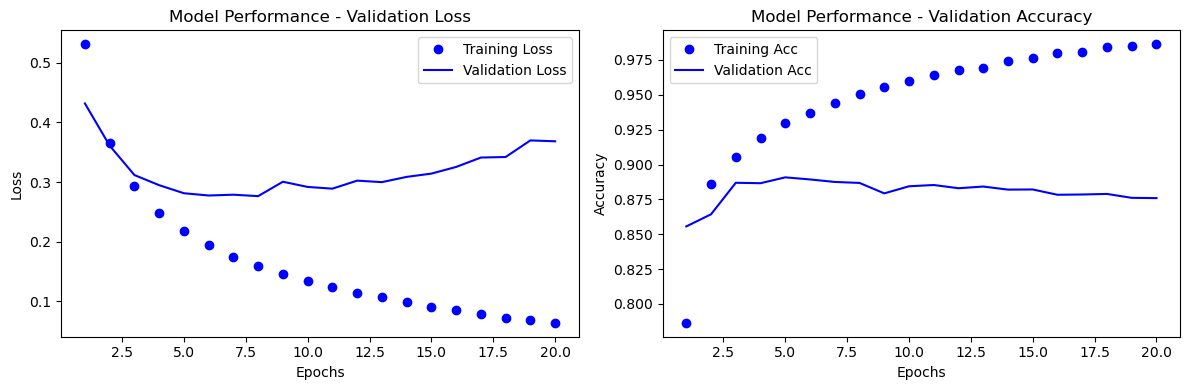

In [ ]:
compare_models(model_1_his,'Model 1')

# ***Validation Set Result from Model 1***:
A model that beats commonsense baseline

| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764  | 0.8908



- We observed model 1 surpassing the commonsense baseline accuracy over 0.5 (0.8908) achieving statistical power and reach maximum validation accuracy at epoch 5
- optimum epoch will be at epoch 8
- The graph show still some underfitting ,we will experiment increase the units to 32 to find noticable overfitting with a bigger model. The batch size and epoch are still maintained

# **Model 2**: 1 Layer & Increasing hidden units to 32

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_2_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 5s 126ms/step - loss: 0.5050 - accuracy: 0.7875 - val_loss: 0.3842 - val_accuracy: 0.8703
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3274 - accuracy: 0.8917 - val_loss: 0.3181 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2574 - accuracy: 0.9143 - val_loss: 0.3056 - val_accuracy: 0.8789
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2189 - accuracy: 0.9284 - val_loss: 0.2900 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1907 - accuracy: 0.9375 - val_loss: 0.2750 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1721 - accuracy: 0.9447 - val_loss: 0.2770 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1548 - accuracy: 0.9509 - val_loss: 0.2838 - val_accuracy: 0.8850
Epoch 8/20
3

                     Min Validation Loss  Max Validation Accuracy  
Model 2              0.2750               0.8892                   


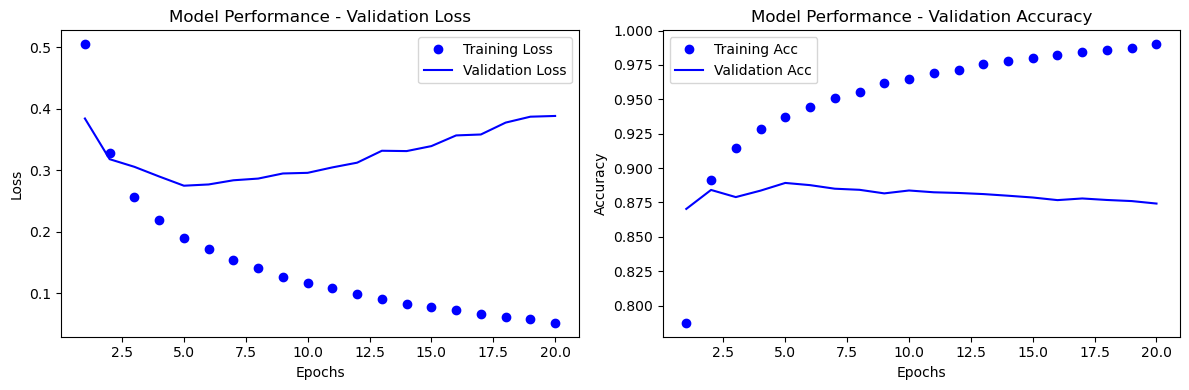

In [ ]:
compare_models(model_2_his,'Model 2')

# ***Validation Set Result from Model 2***

| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892


- The min validation loss has decrease to 0.2750 and max validation accuracy is decreased slightly to 0.8892
- the model reach min loss and max acc both at epoch 5,which is the optimum epoch
- The result on graphs has not much difference as in model 1 in identifying overfitting

# 6. Scaling Up : Develop a model that overfits
We will create a model which introducing non-linearity with 2 layer.This bigger model will ensure overfitting and it will be used to compare with models that will be regularized and optimized with tuning of hyperparameters.

# **Model 3**: 2 Layer & 16 Hidden Unit



In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_3_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 4s 68ms/step - loss: 0.6248 - accuracy: 0.5847 - val_loss: 0.5670 - val_accuracy: 0.6891
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5176 - accuracy: 0.7881 - val_loss: 0.5077 - val_accuracy: 0.8107
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4555 - accuracy: 0.8735 - val_loss: 0.4735 - val_accuracy: 0.8218
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3728 - accuracy: 0.9157 - val_loss: 0.3793 - val_accuracy: 0.8745
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2718 - accuracy: 0.9362 - val_loss: 0.3297 - val_accuracy: 0.8792
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2083 - accuracy: 0.9443 - val_loss: 0.2939 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1643 - accuracy: 0.9548 - val_loss: 0.2910 - val_accuracy: 0.8846
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


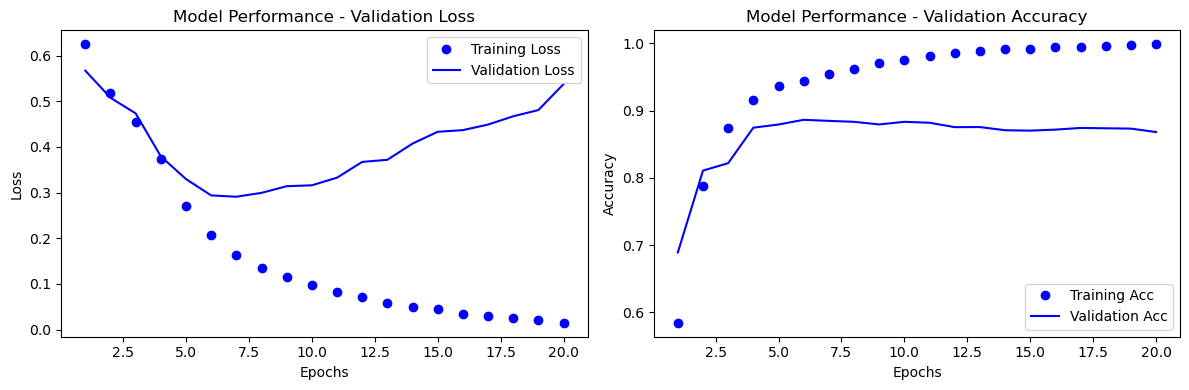

In [ ]:
compare_models(model_3_his,"Model 3")

# ***Validation Set Result from Model 3***

| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862



- Adding extra layer makes overfitting obvious and fast especially in loss plot. The min validation loss has sharply increased to 0.2901 and max validation accuracy decreased to 0.8862 therefore is suitable to use for making comparison for progressing towards our final optimized model
- From loss plot we can see overfitting begining since the optimum epoch 6


# **Model 4**: Decreasing batch size to 384
- Comparison with model 3 will start with model 4 introducing decrease of batch size to 384,creating more randomness(stochasticity) into the training process,we will observe if this tuning would help the model escape from local minima and render a optimized model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
#decreased batch size
model_4_his = model_train(model,partial_x_train,partial_y_train,20,384,x_val,y_val,1).history

Epoch 1/20
40/40 [==============================] - 3s 52ms/step - loss: 0.4819 - accuracy: 0.8023 - val_loss: 0.3875 - val_accuracy: 0.8524
Epoch 2/20
40/40 [==============================] - 1s 24ms/step - loss: 0.3024 - accuracy: 0.9021 - val_loss: 0.3251 - val_accuracy: 0.8713
Epoch 3/20
40/40 [==============================] - 1s 23ms/step - loss: 0.2385 - accuracy: 0.9215 - val_loss: 0.2849 - val_accuracy: 0.8898
Epoch 4/20
40/40 [==============================] - 1s 21ms/step - loss: 0.1981 - accuracy: 0.9357 - val_loss: 0.2748 - val_accuracy: 0.8907
Epoch 5/20
40/40 [==============================] - 1s 20ms/step - loss: 0.1718 - accuracy: 0.9455 - val_loss: 0.2738 - val_accuracy: 0.8904
Epoch 6/20
40/40 [==============================] - 1s 22ms/step - loss: 0.1496 - accuracy: 0.9527 - val_loss: 0.3009 - val_accuracy: 0.8781
Epoch 7/20
40/40 [==============================] - 1s 23ms/step - loss: 0.1342 - accuracy: 0.9580 - val_loss: 0.2840 - val_accuracy: 0.8867
Epoch 8/20
40

                     Min Validation Loss  Max Validation Accuracy  
Model 4              0.2738               0.8907                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


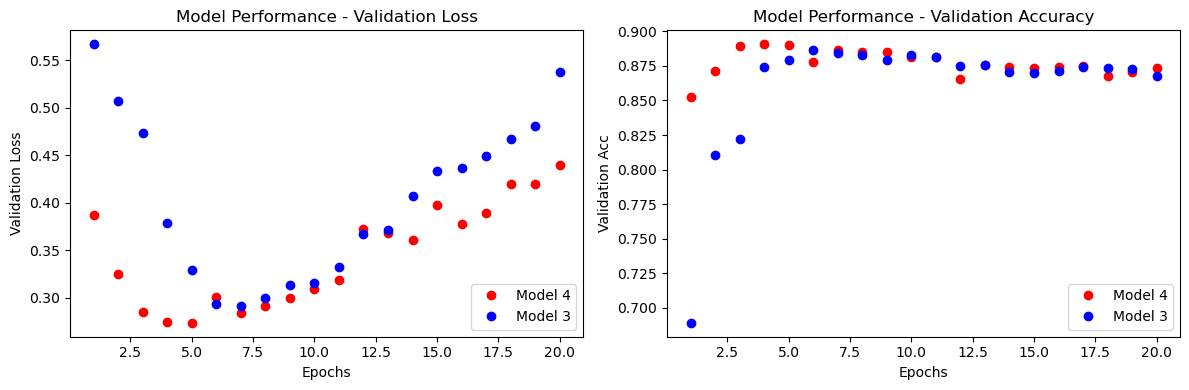

In [ ]:
compare_models(model_3_his,'Model 3',model_4_his,'Model 4')

# ***Validation Set Result from Model 4***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907    

- the min validation loss of Model 4 decreased to new lowest 0.2738 at epoch 5 and then it starts overfitting.Its max validation accuracy has increase at new highest at 0.8907 at epoch 4 but degrade afterwards.
- the optimum epoch is at epoch 5
- We can see less overfitting of the loss graph. Therefore decreasing batch size will be an consideration for addressing our final optimized model



# **Model 5**: Increasing number of epochs to 30

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
#increase number of epochs
model_5_his = model_train(model,partial_x_train,partial_y_train,30,512,x_val,y_val,1).history

Epoch 1/30
30/30 [==============================] - 4s 83ms/step - loss: 0.5085 - accuracy: 0.7903 - val_loss: 0.3994 - val_accuracy: 0.8643
Epoch 2/30
30/30 [==============================] - 1s 27ms/step - loss: 0.3330 - accuracy: 0.8956 - val_loss: 0.3372 - val_accuracy: 0.8736
Epoch 3/30
30/30 [==============================] - 1s 25ms/step - loss: 0.2666 - accuracy: 0.9157 - val_loss: 0.2976 - val_accuracy: 0.8876
Epoch 4/30
30/30 [==============================] - 1s 23ms/step - loss: 0.2227 - accuracy: 0.9304 - val_loss: 0.2872 - val_accuracy: 0.8856
Epoch 5/30
30/30 [==============================] - 1s 24ms/step - loss: 0.1948 - accuracy: 0.9389 - val_loss: 0.2763 - val_accuracy: 0.8886
Epoch 6/30
30/30 [==============================] - 1s 25ms/step - loss: 0.1730 - accuracy: 0.9459 - val_loss: 0.2972 - val_accuracy: 0.8774
Epoch 7/30
30/30 [==============================] - 1s 25ms/step - loss: 0.1567 - accuracy: 0.9504 - val_loss: 0.2753 - val_accuracy: 0.8854
Epoch 8/30
30

                     Min Validation Loss  Max Validation Accuracy  
Model 5              0.2753               0.8886                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


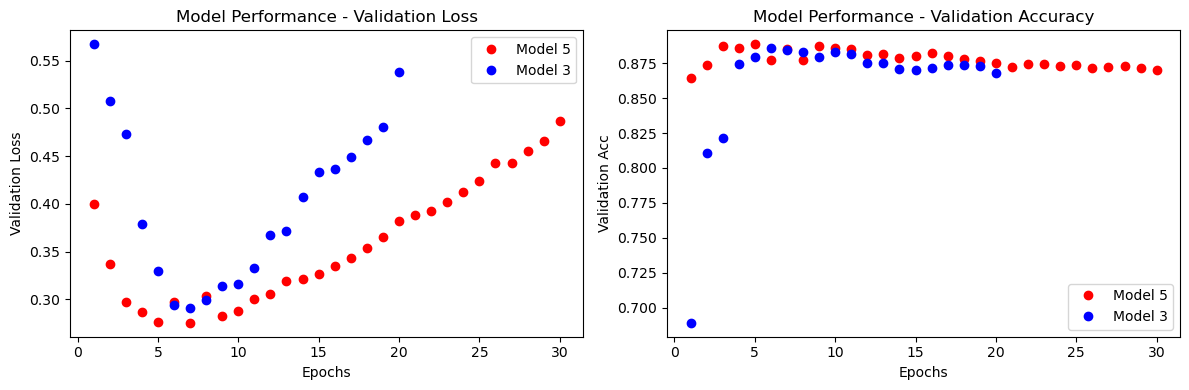

In [ ]:
compare_models(model_3_his,'Model 3',model_5_his,'Model 5')

# ***Validation Set Result from Model 5***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907      
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886   

- the min validation loss is increased back to 0.2753 at epoch 7 and max validation accuracy has decrease by 0.01 at epoch 5
- optimum epoch at epoch 5
- we can see that Model 5 overfits in loss graph, therefore increasing number of epochs will not be an consideration for addressing our final optimized model


# **Model 6**: 2 Layer & Decreasing hidden units to 8

In [ ]:
tf.keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(8, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_6_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 4s 86ms/step - loss: 0.5990 - accuracy: 0.7592 - val_loss: 0.4992 - val_accuracy: 0.8367
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4256 - accuracy: 0.8797 - val_loss: 0.3932 - val_accuracy: 0.8704
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3296 - accuracy: 0.8999 - val_loss: 0.3344 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2694 - accuracy: 0.9163 - val_loss: 0.3029 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2281 - accuracy: 0.9267 - val_loss: 0.2955 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1995 - accuracy: 0.9351 - val_loss: 0.2786 - val_accuracy: 0.8896
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1748 - accuracy: 0.9447 - val_loss: 0.2753 - val_accuracy: 0.8895
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 6              0.2753               0.8896                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


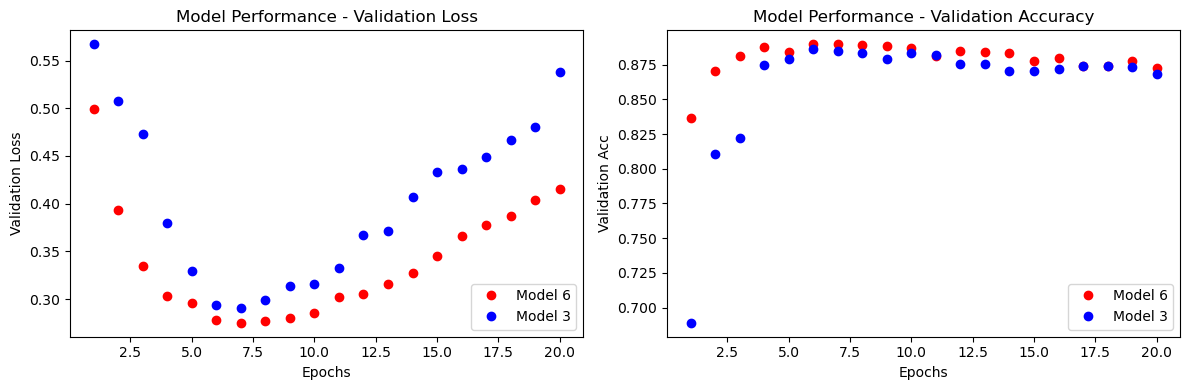

In [ ]:
compare_models(model_3_his,'Model 3',model_6_his,'Model 6')

# ***Validation Set Result from Model 6***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907      
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886     
| 6 | 2 | 8 | 512 |20| 0.001 | None | None | None| None | 0.2753  | 0.8896   


- The min validation loss has remained the same, max validation accuracy has increased.
- optimum epoch is moving later to epoch 7 than the previous model
- The min loss graph shows gradual overfitting in the loss graph starting epoch 7, and validation accuracy has peaked then drop at the end of training therefore using 2 layer and decreasing unit hyperparamters to 8 will not be a consideration element for addressing our final model



# **Model 7**: Increase learning rate to 0.01

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_7_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 4s 82ms/step - loss: 0.5378 - accuracy: 0.7361 - val_loss: 0.3924 - val_accuracy: 0.8396
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2964 - accuracy: 0.8943 - val_loss: 0.3209 - val_accuracy: 0.8660
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2141 - accuracy: 0.9208 - val_loss: 0.3179 - val_accuracy: 0.8695
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1727 - accuracy: 0.9366 - val_loss: 0.2737 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1403 - accuracy: 0.9491 - val_loss: 0.2871 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1159 - accuracy: 0.9619 - val_loss: 0.3077 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0865 - accuracy: 0.9713 - val_loss: 0.3278 - val_accuracy: 0.8780
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 7              0.2737               0.8869                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


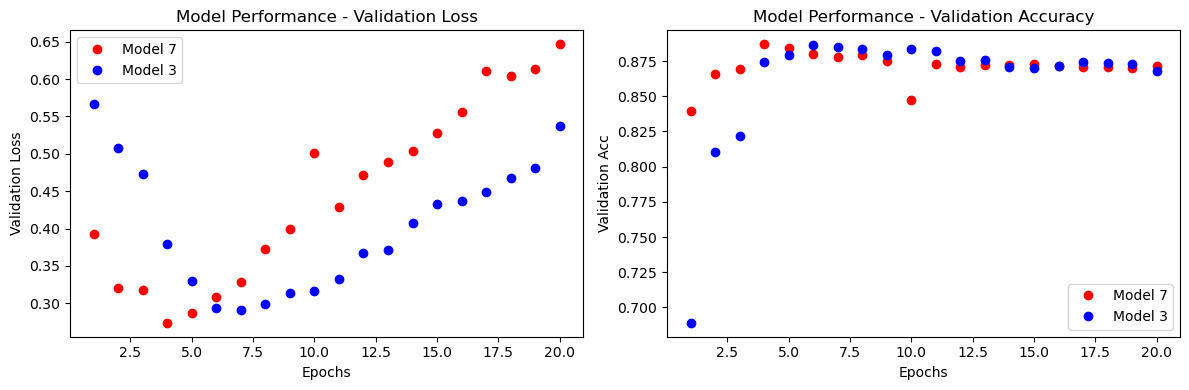

In [ ]:
compare_models(model_3_his,'Model 3',model_7_his,'Model 7')

# ***Validation Set Result from Model 7***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907      
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886     
| 6 | 2 | 8 | 512 |20| 0.001 | None | None | None| None | 0.2753  | 0.8896    
| 7 | 1 | 16 | 512 | 20| 0.01 | None | None | None | None | 0.2737 | 0.8869

- In model 7, min validation loss has decresed to a new lowest 0.2737 only at early epoch 4 then shoots up, max validation accuracy also decreased to 0.8869.
- optimum epoch too early at epoch 4
- The min loss graph is showing rapid overfitting. Thus,tuning learning rate of 0.01 will not be a element for addressing our final model.We will create Model 8 with an lower learning rate to examine differences compared to model 3.


# **Model 8**: Decrease learning rate to 0.0005


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_8_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5687 - accuracy: 0.7639 - val_loss: 0.4750 - val_accuracy: 0.8313
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4075 - accuracy: 0.8733 - val_loss: 0.3874 - val_accuracy: 0.8663
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3324 - accuracy: 0.8969 - val_loss: 0.3436 - val_accuracy: 0.8762
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2861 - accuracy: 0.9101 - val_loss: 0.3183 - val_accuracy: 0.8823
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2536 - accuracy: 0.9220 - val_loss: 0.3025 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2286 - accuracy: 0.9281 - val_loss: 0.2890 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2096 - accuracy: 0.9346 - val_loss: 0.2893 - val_accuracy: 0.8843
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 8              0.2766               0.8898                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


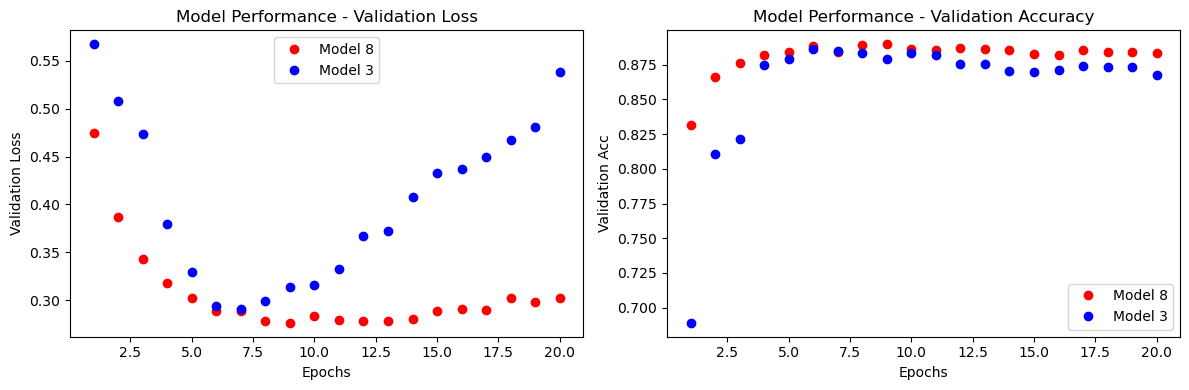

In [ ]:
compare_models(model_3_his,'Model 3',model_8_his,'Model 8')

# ***Validation Set Result from Model 8***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907      
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886     
| 6 | 2 | 8 | 512 |20| 0.001 | None | None | None| None | 0.2753  | 0.8896    
| 7 | 1 | 16 | 512 | 20| 0.01 | None | None | None | None | 0.2737 | 0.8869
| 8 | 1 | 16 | 512 | 20 |0.0005| None | None | None | None |  0.2766  | 0.8898

- Min validation loss is increased back and max validation accuracy increased to 0.8898 much later at epoch 9.
- optimal epoch at epoch 9
- In the loss graph we see Model 8 reach min validation loss of 0.2766 at middle of epoch 9 slightly increases in the end signaling decreasing learning rate will not be an element for our final optimized model.

# **Model 9**: Increase momentum rate to 0.1


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001,momentum=0.1),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_9_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5217 - accuracy: 0.7950 - val_loss: 0.4052 - val_accuracy: 0.8594
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3377 - accuracy: 0.8931 - val_loss: 0.3328 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2649 - accuracy: 0.9163 - val_loss: 0.3002 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2221 - accuracy: 0.9281 - val_loss: 0.2847 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1936 - accuracy: 0.9376 - val_loss: 0.2856 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1713 - accuracy: 0.9461 - val_loss: 0.2764 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1534 - accuracy: 0.9539 - val_loss: 0.2823 - val_accuracy: 0.8865
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 9              0.2764               0.8871                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


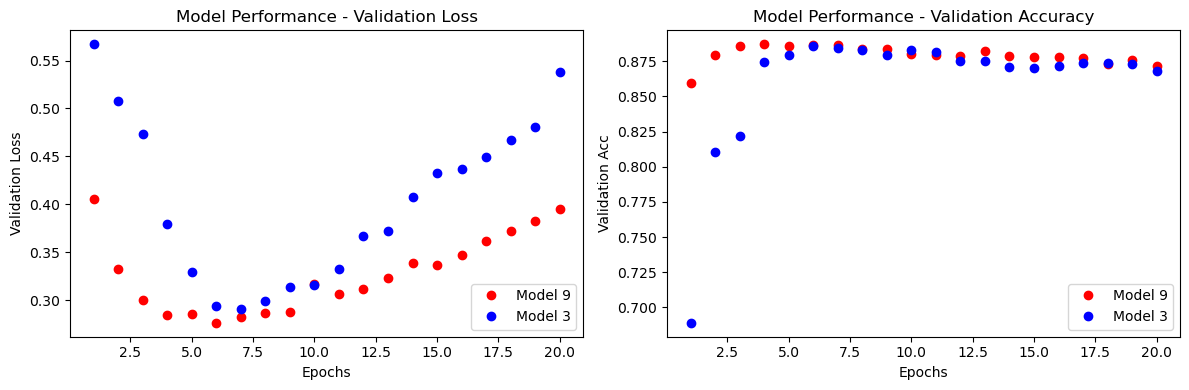

In [ ]:
compare_models(model_3_his,'Model 3',model_9_his,'Model 9')

# ***Validation Set Result from Model 9***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907      
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886     
| 6 | 2 | 8 | 512 |20| 0.001 | None | None | None| None | 0.2753  | 0.8896    
| 7 | 1 | 16 | 512 | 20| 0.01 | None | None | None | None | 0.2737 | 0.8869
| 8 | 1 | 16 | 512 | 20 |0.0005| None | None | None | None |  0.2766  | 0.8898
| 9 | 1 | 16 | 512 | 20 | 0.001 | 0.1 | None | None | None | 0.2764 | 0.8871

- The introduce of momentum rate 0.1 has no significant improvement for max validation accuracy and min validation loss decrease The loss graph still show overfitting.Therefore,we will try with a smaller momentum rate of 0.05.The validation graph shows highest early at epoch 4 decreases in the end.
- Increasing momentum rate of 0.1 will not be an consideration for our final optimized model.


# **Model 10**: Decrease momentum rate to 0.05


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001,momentum=0.05),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_10_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.5455 - accuracy: 0.7825 - val_loss: 0.4470 - val_accuracy: 0.8483
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3725 - accuracy: 0.8855 - val_loss: 0.3525 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2943 - accuracy: 0.9060 - val_loss: 0.3217 - val_accuracy: 0.8789
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2493 - accuracy: 0.9177 - val_loss: 0.2948 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2173 - accuracy: 0.9291 - val_loss: 0.2814 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1940 - accuracy: 0.9383 - val_loss: 0.3027 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1754 - accuracy: 0.9448 - val_loss: 0.2795 - val_accuracy: 0.8863
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 10             0.2795               0.8889                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


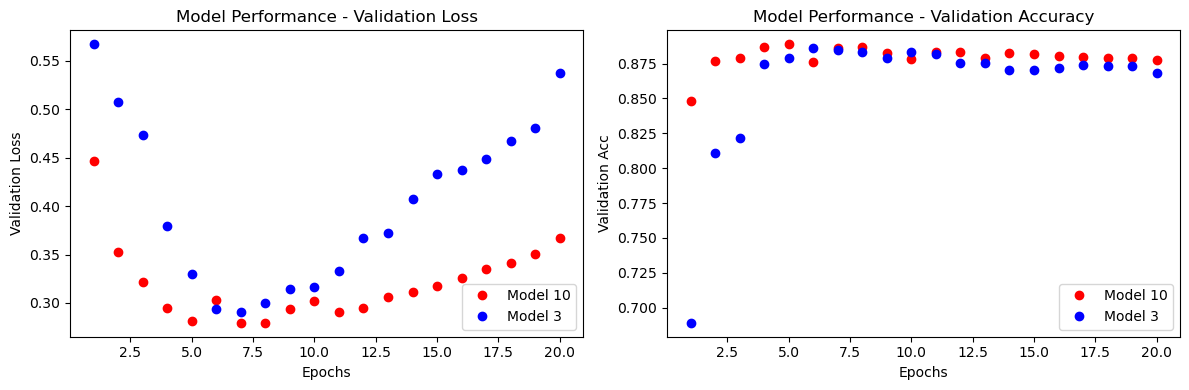

In [ ]:
compare_models(model_3_his,'Model 3',model_10_his,'Model 10')

# ***Validation Set Result from Model 10***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907      
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886     
| 6 | 2 | 8 | 512 |20| 0.001 | None | None | None| None | 0.2753  | 0.8896    
| 7 | 1 | 16 | 512 | 20| 0.01 | None | None | None | None | 0.2737 | 0.8869
| 8 | 1 | 16 | 512 | 20 |0.0005| None | None | None | None |  0.2766  | 0.8898
| 9 | 1 | 16 | 512 | 20 | 0.001 | 0.1 | None | None | None | 0.2764 | 0.8871
| 10 | 1 | 16 | 512 | 20 | 0.001 | 0.05 | None | None | None | 0.2795  | 0.8889  
- Min validation loss has increased to 0.2795 and max validation accuracy increase to 0.8889
- Decreasing the momentum rate to half (0.05) has caused higher validation in the end loss graph,therefore momentum rate is not considered as an element for our final optimized model.

# **Model 11**: Adding L1(lasso) Regularisation
L1 regularisation adds penalty to loss function that based on the absolute values of the weights.It can help optimize a model by ignoring very small irrelavant weights.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001), activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_11_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 1.0937 - accuracy: 0.7543 - val_loss: 0.6923 - val_accuracy: 0.8016
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6468 - accuracy: 0.8336 - val_loss: 0.6331 - val_accuracy: 0.8393
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6087 - accuracy: 0.8448 - val_loss: 0.6180 - val_accuracy: 0.8248
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5898 - accuracy: 0.8444 - val_loss: 0.5920 - val_accuracy: 0.8461
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5737 - accuracy: 0.8507 - val_loss: 0.5839 - val_accuracy: 0.8487
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5628 - accuracy: 0.8503 - val_loss: 0.5675 - val_accuracy: 0.8479
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5539 - accuracy: 0.8547 - val_loss: 0.6288 - val_accuracy: 0.8054
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 11             0.5337               0.8604                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


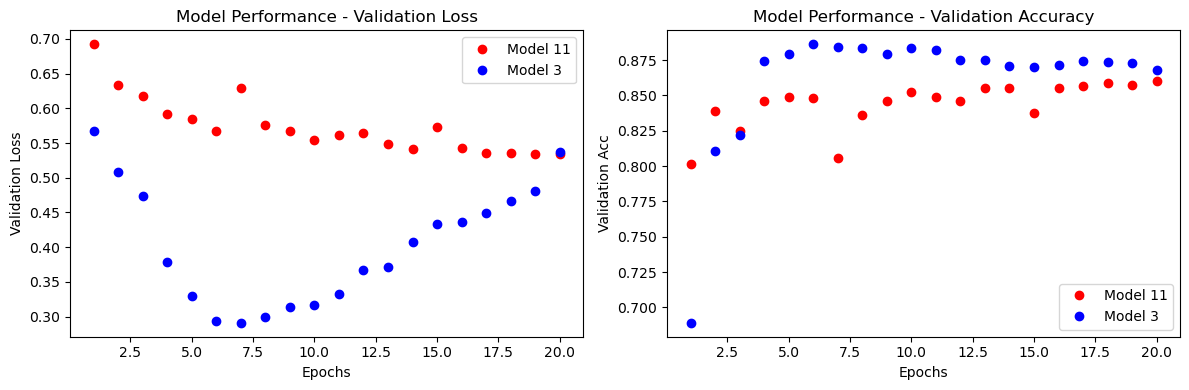

In [ ]:
compare_models(model_3_his,'Model 3',model_11_his,'Model 11')

# ***Validation Set Result from Model 11***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907     
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886     
| 6 | 2 | 8 | 512 |20| 0.001 | None | None | None| None | 0.2753  | 0.8896    
| 7 | 1 | 16 | 512 | 20| 0.01 | None | None | None | None | 0.2737 | 0.8869
| 8 | 1 | 16 | 512 | 20 |0.0005| None | None | None | None |  0.2766  | 0.8898
| 9 | 1 | 16 | 512 | 20 | 0.001 | 0.1 | None | None | None | 0.2764 | 0.8871
| 10 | 1 | 16 | 512 | 20 | 0.001 | 0.05 | None | None | None | 0.2795  | 0.8889
| 11 | 1 | 16 | 512 | 20 | 0.01 | None | 0.001 | None | None | 0.5337  | 0.8604  
- Adding L1 regularisation supposed to prevent overfitting has worsen it, min validation loss increased sharply to 0.5337 and decreased max validation loss sharply to 0.8604. In this case, L1 regularisation is not considered for our final optimized model

# **Model 12**: Adding L2(ridge) Regularisation
L2 regularization works with adding penalty to the loss function that is proportional to the squared of the model's weights.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation="relu", input_shape=(10000,)))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_12_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5400 - accuracy: 0.7779 - val_loss: 0.4248 - val_accuracy: 0.8666
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3652 - accuracy: 0.8930 - val_loss: 0.3623 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3023 - accuracy: 0.9136 - val_loss: 0.3349 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2686 - accuracy: 0.9253 - val_loss: 0.3308 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2503 - accuracy: 0.9313 - val_loss: 0.3244 - val_accuracy: 0.8874
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2367 - accuracy: 0.9400 - val_loss: 0.3282 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2263 - accuracy: 0.9426 - val_loss: 0.3279 - val_accuracy: 0.8851
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 12             0.3244               0.8904                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


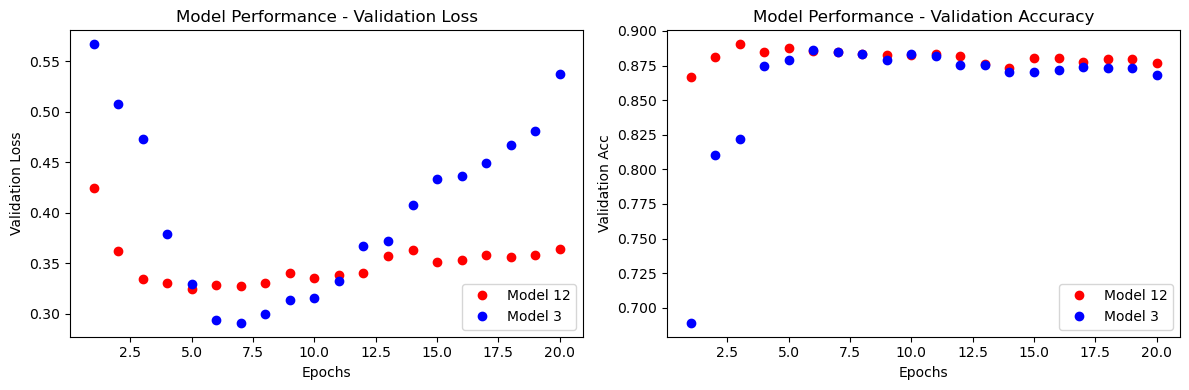

In [ ]:
compare_models(model_3_his,'Model 3',model_12_his,'Model 12')

# ***Validation Set Result from Model 12***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907     
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886     
| 6 | 2 | 8 | 512 |20| 0.001 | None | None | None| None | 0.2753  | 0.8896    
| 7 | 1 | 16 | 512 | 20| 0.01 | None | None | None | None | 0.2737 | 0.8869
| 8 | 1 | 16 | 512 | 20 |0.0005| None | None | None | None |  0.2766  | 0.8898
| 9 | 1 | 16 | 512 | 20 | 0.001 | 0.1 | None | None | None | 0.2764 | 0.8871
| 10 | 1 | 16 | 512 | 20 | 0.001 | 0.05 | None | None | None | 0.2795  | 0.8889
| 11 | 1 | 16 | 512 | 20 | 0.01 | None | 0.001 | None | None | 0.5337  | 0.8604  
| 12 | 1 | 16 | 512 | 20 | 0.01 | None | None | 0.001 | None | 0.3244  | 0.8904

- L2 regularisation has introduced sharp increase in min validation loss to 0.3271 at epoch 7 and max validation accuracy has increased to 3rd-high, 0.8904 at epoch 4.The model has some slight overfitting. These insights showed L2 regularisation might be helpful in leveraging max validation accuracy for addressing our final optimized model.


# **Model 13**: Add drop-out of 0.5 for regularisation


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_13_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5550 - accuracy: 0.7318 - val_loss: 0.4424 - val_accuracy: 0.8407
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3987 - accuracy: 0.8511 - val_loss: 0.3520 - val_accuracy: 0.8781
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3295 - accuracy: 0.8815 - val_loss: 0.3244 - val_accuracy: 0.8770
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2873 - accuracy: 0.8973 - val_loss: 0.2945 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2553 - accuracy: 0.9093 - val_loss: 0.2825 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2289 - accuracy: 0.9217 - val_loss: 0.2756 - val_accuracy: 0.8907
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2097 - accuracy: 0.9298 - val_loss: 0.2733 - val_accuracy: 0.8892
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 13             0.2710               0.8907                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


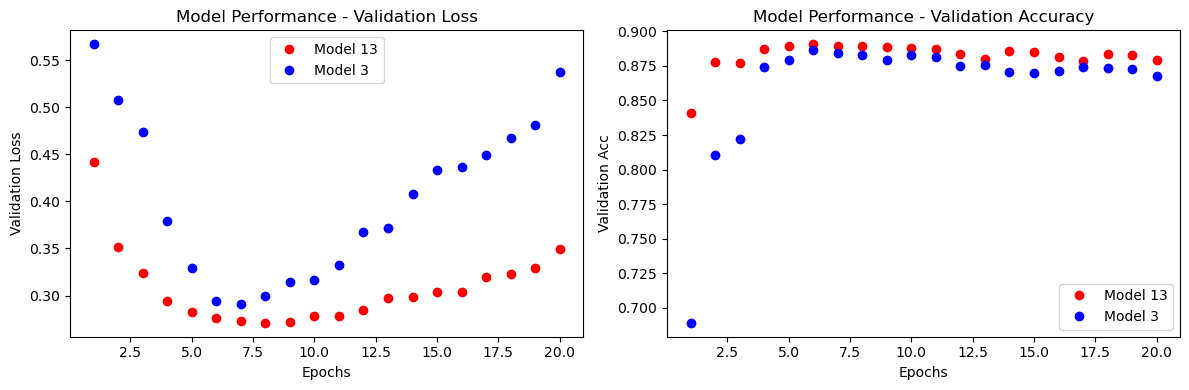

In [ ]:
compare_models(model_3_his,'Model 3',model_13_his,'Model 13')

# ***Validation Set Result from Model 13***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907     
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886     
| 6 | 2 | 8 | 512 |20| 0.001 | None | None | None| None | 0.2753  | 0.8896    
| 7 | 1 | 16 | 512 | 20| 0.01 | None | None | None | None | 0.2737 | 0.8869
| 8 | 1 | 16 | 512 | 20 |0.0005| None | None | None | None |  0.2766  | 0.8898
| 9 | 1 | 16 | 512 | 20 | 0.001 | 0.1 | None | None | None | 0.2764 | 0.8871
| 10 | 1 | 16 | 512 | 20 | 0.001 | 0.05 | None | None | None | 0.2795  | 0.8889
| 11 | 1 | 16 | 512 | 20 | 0.01 | None | 0.001 | None | None | 0.5337  | 0.8604  
| 12 | 1 | 16 | 512 | 20 | 0.01 | None | None | 0.001 | None | 0.3244  | 0.8904   
| 13 | 1 | 16 | 512 | 20 | 0.01 | None | None | None | 0.5 | 0.2710    | 0.8862   
- The main idea of dropout is to prevent adaptation relation between neurons by randomly dropping out neurons and identify overfitting.We can see our min validation loss has reach the smallest seen at 0.2710 and max validation loss increased at 0.8862.However,the graph still shows  overfitting.
- optimum epoch at epoch 8
- We will further try drop out with larger value 0.8 and decide if decrasing dropout value will be a element for addressing our final model.


# **Model 14**: Add drop-out of 0.8 for regularisation


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_14_his = model_train(model,partial_x_train,partial_y_train,20,512,x_val,y_val,1).history

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6398 - accuracy: 0.6198 - val_loss: 0.5546 - val_accuracy: 0.8267
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5435 - accuracy: 0.7245 - val_loss: 0.4739 - val_accuracy: 0.8639
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4872 - accuracy: 0.7740 - val_loss: 0.4122 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4435 - accuracy: 0.8031 - val_loss: 0.3833 - val_accuracy: 0.8773
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4154 - accuracy: 0.8181 - val_loss: 0.3493 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3954 - accuracy: 0.8324 - val_loss: 0.3359 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3711 - accuracy: 0.8447 - val_loss: 0.3137 - val_accuracy: 0.8890
Epoch 8/20
30

                     Min Validation Loss  Max Validation Accuracy  
Model 14             0.2736               0.8922                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


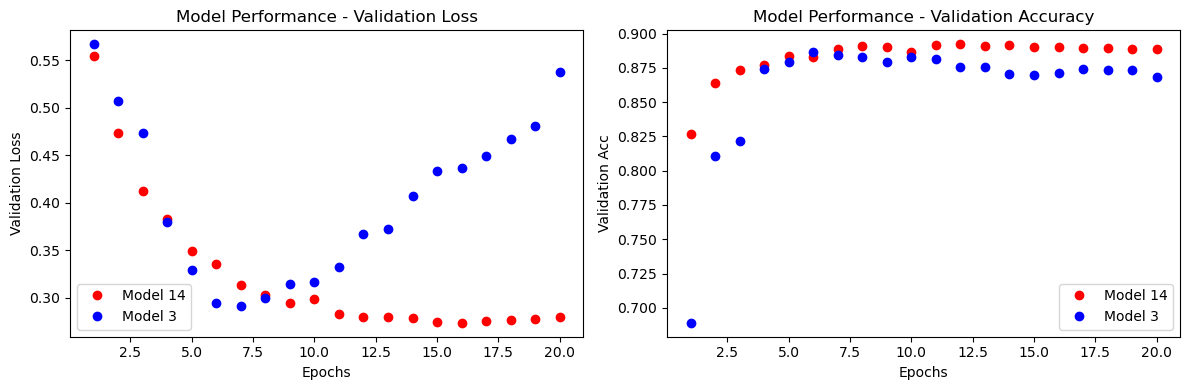

In [ ]:
compare_models(model_3_his,'Model 3',model_14_his,'Model 14')

# ***Validation Set Result from Model 14***
| Model | Layer | Hid.Units | Batch size | Epoch | Learning rate| Momentum | reg1 | reg2 | Dropout | Min Validation Loss | Max Validation Accuracy
| --- | --- | --- | ---|--- |--- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 16 |512 |20 | 0.001 | None |None | None | None | 0.2764 | 0.8908
| 2 | 1 | 32 | 512|20 | 0.001 | None | None | None | None | 0.2750| 0.8892
| 3 | 2 | 16 | 512|20 | 0.001 | None | None | None | None | 0.2910 | 0.8862
| 4 | 1 | 16 | 384 |20| 0.001 | None | None | None| None | 0.2738 | 0.8907     
| 5 | 1 | 16 | 512 |30| 0.001 | None | None | None| None |  0.2753 | 0.8886     
| 6 | 2 | 8 | 512 |20| 0.001 | None | None | None| None | 0.2753  | 0.8896    
| 7 | 1 | 16 | 512 | 20| 0.01 | None | None | None | None | 0.2737 | 0.8869
| 8 | 1 | 16 | 512 | 20 |0.0005| None | None | None | None |  0.2766  | 0.8898
| 9 | 1 | 16 | 512 | 20 | 0.001 | 0.1 | None | None | None | 0.2764 | 0.8871
| 10 | 1 | 16 | 512 | 20 | 0.001 | 0.05 | None | None | None | 0.2795  | 0.8889
| 11 | 1 | 16 | 512 | 20 | 0.01 | None | 0.001 | None | None | 0.5337  | 0.8604  
| 12 | 1 | 16 | 512 | 20 | 0.01 | None | None | 0.001 | None | 0.3244  | 0.8904   
| 13 | 1 | 16 | 512 | 20 | 0.01 | None | None | None | 0.5 | 0.2710    | 0.8862   
| 14 | 1 | 16 | 512 | 20 | 0.01 | None | None | None | 0.8 | 0.2736     | 0.8922     
- In Model 14, min val loss has decreased to 0.2736 and max val accuracy increased significantly to 0.8922.Furthermore,it has show overfitting improved.This is a best model so far compared to model 3. Adding adding dropout of 0.8 size will be a element for addressing our final model
- Model move progressively towards optimum epoch at further epoch 16 which is statisfactory

### Summarization of models
| Model | Description | Justification | Selected for optimal model
| --- | --- | --- | --- |
| 1  | 1 layer & 16 Units         | Underfitting but high val accuracy | Yes |
| 2  | 1 layer & 32 Units         | Slight overfitting,too much units |
| 3  | 2 layer & 16 Units         | Overfitting, high val loss |
| 4  | Decrease batch size to 364         | Less overfitting,high val accuracy |Yes|
| 5  | Increase epoch to 30       | Rapid overfit,high val loss and less accuracy  ||
| 6  | 2 layer & 8 Units        |  Overfitting slightly eventhough high val accuracy| |
| 7  | Increasing learning rate to 0.01       | Rapid overfitting,less val accuracy ||
| 8  | Decreasing learning rate to 0.005 | Better than model 7 but higher val loss |  |
| 9  | Increase momentum rate to 0.1 | Slight overfitting, increase val loss and losing val accuracy |  |
| 10  | Decrease momentum rate to 0.05 | Underfitting, increasing val loss |  |
| 11 | L1 regularisation | Rapid overfitting, extreme increase in val loss |  |
| 12 | L2 regularisation | Less overfitting,high result on val acc | Yes |
| 13  | Increase drop-out of 0.5 | Slight overfitting, increasing in val acc |  |
| 14 | Increase dropout  rate to 0.8 | Better than model 13, optimum val loss with best val acc | Yes |




# **Model 15:** Final Optimized Model
### 1 layer, 16 Hidden Units , batch size(384) ,L2 regularisation(0.001),dropout (0.8) ,learning rate (0.001),no momentum

The final optimized model is a generalization from these model:
| Model | Description | Justification | Selected for optimal model
| --- | --- | --- | --- |
| 1  | 1 layer & 16 Units         | High val accuracy |Yes |
| 4  | Decrease batch size to 364         | Less overfitting,high val accuracy |Yes|
| 12 | L2 regularisation | Slight overfitting,high val accuracy | Yes |
| 14 | Decreasing dropout  rate to 0.8 | slightly low val loss and best val accuracy | Yes |

In [ ]:
optimizedModel = models.Sequential()
optimizedModel.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation="relu", input_shape=(10000,)))
optimizedModel.add(layers.Dropout(0.8))
optimizedModel.add(layers.Dense(1, activation="sigmoid"))

optimizedModel.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_15_his = model_train(optimizedModel,partial_x_train,partial_y_train,20,384,x_val,y_val,1).history


Epoch 1/20
40/40 [==============================] - 2s 30ms/step - loss: 0.6576 - accuracy: 0.6255 - val_loss: 0.5575 - val_accuracy: 0.8431
Epoch 2/20
40/40 [==============================] - 1s 16ms/step - loss: 0.5409 - accuracy: 0.7332 - val_loss: 0.4468 - val_accuracy: 0.8683
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4865 - accuracy: 0.7660 - val_loss: 0.4085 - val_accuracy: 0.8734
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4515 - accuracy: 0.7858 - val_loss: 0.3836 - val_accuracy: 0.8736
Epoch 5/20
40/40 [==============================] - 1s 16ms/step - loss: 0.4259 - accuracy: 0.7985 - val_loss: 0.3644 - val_accuracy: 0.8845
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4101 - accuracy: 0.8039 - val_loss: 0.3456 - val_accuracy: 0.8805
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.3973 - accuracy: 0.8207 - val_loss: 0.3326 - val_accuracy: 0.8886
Epoch 8/20
40

                     Min Validation Loss  Max Validation Accuracy  
Model 15             0.3230               0.8886                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


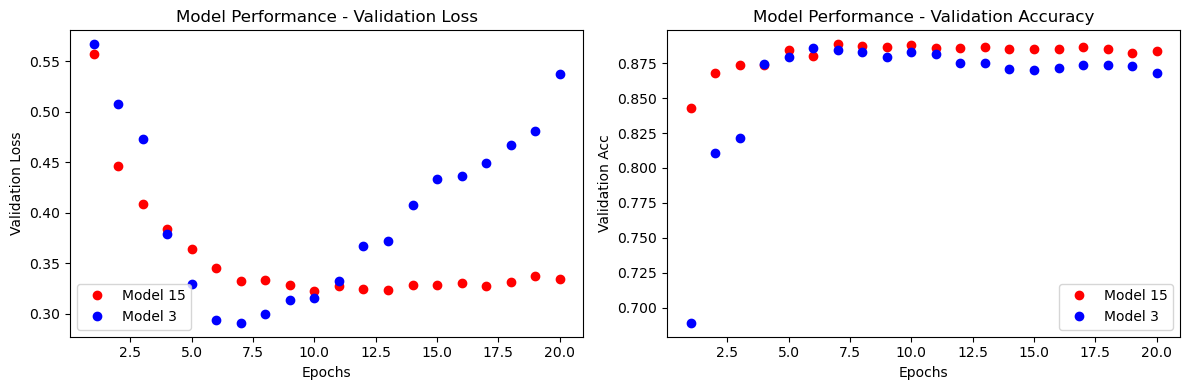

In [ ]:
compare_models(model_3_his,'Model 3',model_15_his,'Model 15')

# Result
## Final optimzed model result on test set

Our final optimized model has addressed overfitting and underfitting optimumly at epoch 10.Compared to performance of Model 3 on validation set ,final model has achieve higher maximum validation accuracy at almost 0.89%.

We predicted our final optimized on unseen test set and it has reached accuracy of almost 0.88% on the unseen test set which is considered statisfactory.

In [ ]:
# optimzed model on unseen test set
optimizedModel.fit(x_train,y_train,epochs=20,batch_size=512)
result_prediction = optimizedModel.evaluate(x_test,y_test,verbose=0)
print(f'Test Loss: {result_prediction[0]}')
print(f'Test Accuracy: {result_prediction[1]}')

Epoch 1/20
49/49 [==============================] - 1s 12ms/step - loss: 0.3775 - accuracy: 0.8476
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3746 - accuracy: 0.8487
Epoch 3/20
49/49 [==============================] - 1s 10ms/step - loss: 0.3717 - accuracy: 0.8534
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3647 - accuracy: 0.8544
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3657 - accuracy: 0.8527
Epoch 6/20
49/49 [==============================] - 1s 10ms/step - loss: 0.3645 - accuracy: 0.8532
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3651 - accuracy: 0.8540
Epoch 8/20
49/49 [==============================] - 1s 10ms/step - loss: 0.3660 - accuracy: 0.8541
Epoch 9/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3604 - accuracy: 0.8552
Epoch 10/20
49/49 [==============================] - 1s 10ms/step - loss: 0.3617 - accuracy: 0.8528
Epoch 11/

In [ ]:
optimizedModel.predict(x_test[:10]) # this show probabilities being negative (0) or positive (1)

1/1 [==============================] - 0s 26ms/step


array([[0.13995545],
       [0.9998905 ],
       [0.9487592 ],
       [0.899858  ],
       [0.9854245 ],
       [0.7875952 ],
       [0.9998833 ],
       [0.00694822],
       [0.978006  ],
       [0.99569565]], dtype=float32)

In [ ]:
#prediction label check from Jeremy Wenger 04.1.classifying-movie-reviews-imdb.ipynb
print('review', '\t', 'prediction → rounded', '\t', 'label', '\t', 'correct?')
print()
for i in range(30):
    y_pred = optimizedModel.predict(x_test[i:i+1], verbose=0)[0][0]
    print(i, '\t', y_pred,'\t', round(y_pred), '\t', test_labels[i], '\t', int(y_pred > .5) == test_labels[i])

review 	 prediction → rounded 	 label 	 correct?

0 	 0.13995545 	 0 	 0 	 True
1 	 0.9998905 	 1 	 1 	 True
2 	 0.94875926 	 1 	 1 	 True
3 	 0.899858 	 1 	 0 	 False
4 	 0.9854245 	 1 	 1 	 True
5 	 0.78759533 	 1 	 1 	 True
6 	 0.9998833 	 1 	 1 	 True
7 	 0.0069482154 	 0 	 0 	 True
8 	 0.978006 	 1 	 0 	 False
9 	 0.99569565 	 1 	 1 	 True
10 	 0.7686766 	 1 	 1 	 True
11 	 0.014363604 	 0 	 0 	 True
12 	 0.0009258127 	 0 	 0 	 True
13 	 0.48532608 	 0 	 0 	 True
14 	 0.99824214 	 1 	 1 	 True
15 	 2.86682e-06 	 0 	 0 	 True
16 	 0.888251 	 1 	 1 	 True
17 	 0.87675995 	 1 	 0 	 False
18 	 0.0017564896 	 0 	 0 	 True
19 	 0.06688898 	 0 	 0 	 True
20 	 0.9938585 	 1 	 1 	 True
21 	 0.99393517 	 1 	 1 	 True
22 	 0.25742328 	 0 	 1 	 False
23 	 0.93236643 	 1 	 1 	 True
24 	 0.8938186 	 1 	 1 	 True
25 	 0.7040695 	 1 	 1 	 True
26 	 0.08469965 	 0 	 0 	 True
27 	 0.83470744 	 1 	 1 	 True
28 	 0.99307305 	 1 	 1 	 True
29 	 1.8693149e-06 	 0 	 0 	 True


# Conclusion

From the result of prediction we can ensure our model is pretty accurate with correctly predicting 26 out of 30 word sentiments.

We have experimented different number of layer,unit hyperparameter,batch size,epochs,learning rates,momentum rate,drop out rate,adding (l1,l2)regularisor,where out of them, drop out value for regularisation has shown significant effect on resolving overfitting in our case.

Some model had reached very good accuracy value when training, reaching top of ~0.89% (model 1 , model 4 ,model 14) and other validation accuracy has a average value of 0.88%. The final model created is not the best and there is still room of improvement by doing more experimentation on hyperparamaters in the future.It will be insightful in future work if we change limit of 10,000 commmon words and observe how it affects with our results.

# Extensive Experimentation
## (using Adam optimizer)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # Change the optimizer to Adam
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_16_his = model_train(model, partial_x_train, partial_y_train, 20, 384, x_val, y_val, 1).history

Epoch 1/20
40/40 [==============================] - 2s 36ms/step - loss: 0.6530 - accuracy: 0.6219 - val_loss: 0.5243 - val_accuracy: 0.8410
Epoch 2/20
40/40 [==============================] - 1s 14ms/step - loss: 0.5211 - accuracy: 0.7619 - val_loss: 0.4398 - val_accuracy: 0.8706
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4680 - accuracy: 0.8037 - val_loss: 0.3957 - val_accuracy: 0.8814
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4385 - accuracy: 0.8263 - val_loss: 0.3722 - val_accuracy: 0.8844
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4179 - accuracy: 0.8424 - val_loss: 0.3666 - val_accuracy: 0.8863
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4076 - accuracy: 0.8533 - val_loss: 0.3533 - val_accuracy: 0.8872
Epoch 7/20
40/40 [==============================] - 1s 14ms/step - loss: 0.3931 - accuracy: 0.8595 - val_loss: 0.3418 - val_accuracy: 0.8875
Epoch 8/20
40

                     Min Validation Loss  Max Validation Accuracy  
Model 16             0.3376               0.8880                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


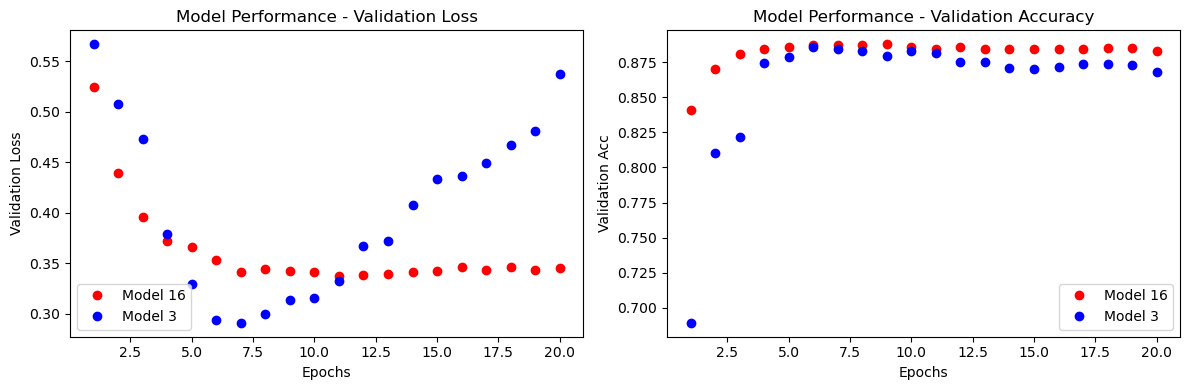

In [ ]:
compare_models(model_3_his,'Model 3',model_16_his,'Model 16')

Observations using adam optimizer :
The model at first learns well on the training data, achieving a high accuracy.
However, there is risk of overfitting, as when the validation accuracy and the validation loss starts to plateau towards the end of training.

## (using tanh activation)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation="tanh", input_shape=(10000,)))  # Change activation to tanh
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_17_his = model_train(model, partial_x_train, partial_y_train, 20, 384, x_val, y_val, 1).history


Epoch 1/20
40/40 [==============================] - 2s 31ms/step - loss: 0.6021 - accuracy: 0.7147 - val_loss: 0.4719 - val_accuracy: 0.8505
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4512 - accuracy: 0.8471 - val_loss: 0.3921 - val_accuracy: 0.8723
Epoch 3/20
40/40 [==============================] - 1s 14ms/step - loss: 0.3902 - accuracy: 0.8719 - val_loss: 0.3581 - val_accuracy: 0.8817
Epoch 4/20
40/40 [==============================] - 1s 14ms/step - loss: 0.3545 - accuracy: 0.8927 - val_loss: 0.3414 - val_accuracy: 0.8853
Epoch 5/20
40/40 [==============================] - 1s 14ms/step - loss: 0.3337 - accuracy: 0.9015 - val_loss: 0.3315 - val_accuracy: 0.8885
Epoch 6/20
40/40 [==============================] - 1s 14ms/step - loss: 0.3160 - accuracy: 0.9073 - val_loss: 0.3290 - val_accuracy: 0.8877
Epoch 7/20
40/40 [==============================] - 1s 14ms/step - loss: 0.3017 - accuracy: 0.9155 - val_loss: 0.3287 - val_accuracy: 0.8877
Epoch 8/20
40

                     Min Validation Loss  Max Validation Accuracy  
Model 17             0.3287               0.8885                   
                     Min Validation Loss  Max Validation Accuracy  
Model 3              0.2910               0.8862                   


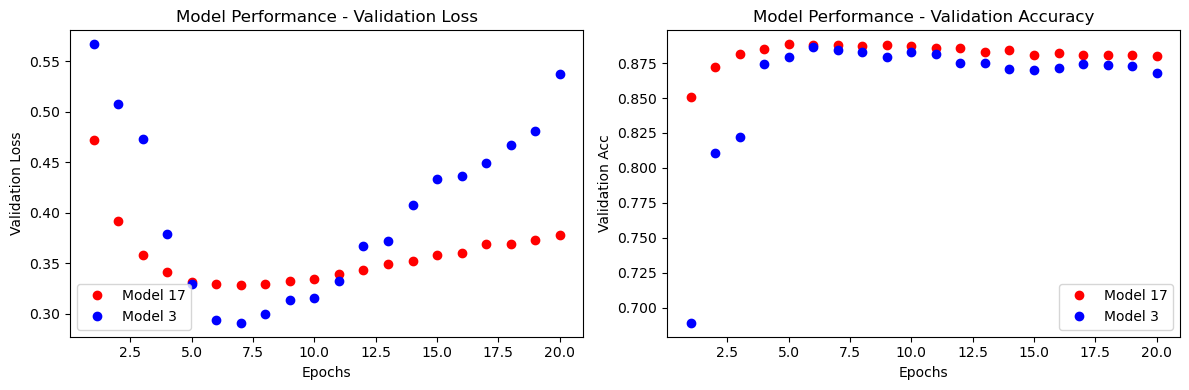

In [ ]:
compare_models(model_3_his,'Model 3',model_17_his,'Model 17')

For Tanh its performance on validation loss overfittingly increases at end of training.

# References
- <a href='https://colab.research.google.com/drive/1HbtuQx2bT5z9lQSK9e1MLjypHkH08vPu#scrollTo=1f00c0db'>Jeremy Wenger 04.1.classifying-movie-reviews-imdb.ipynb (2023)</a>
- <a href="https://www.manning.com/books/deep-learning-with-python">Francois Chollet Deep Learning With Python (2021)</a>

- <a href='https://keras.io/api/datasets/imdb/'>IMDB movie review sentiment classification dataset <a>